#Alignment of protein sequences
Program trying to find best alignment of two protein sequences using Needleman-Wunsch algorithm.
####Agneiszka Brdys

### Instalation of Biopython:

In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.2 MB/s eta 0:00:00


###Loading sequence based on ID from the UniProt service:
The function returns the sequence based on the ID from the UniProt service or returns information if an incorrect ID is provided.

In [2]:
from Bio.SeqIO.UniprotIO import UniprotIterator
from Bio import SeqIO
from Bio import ExPASy

def read_seq_from_uniprot(uniprot_id):
  """
  Reads a sequence from the UniProt database using the provided UniProt ID.
  Args:
      uniprot_id (str): The UniProt ID of the protein.
  Returns:
      The sequence of the protein obtained from UniProt.
  Raises:
      ValueError: If the provided UniProt ID does not exist in the UniProt database.
  """
  try:

    with ExPASy.get_sprot_raw(uniprot_id) as handle:
      for record in SeqIO.parse(handle, "swiss"):
          return record.seq

  except(ValueError):
    print("The provided ID does not exist in the UniProt database.")

uniprot_id = "P38398"
read_seq_from_uniprot(uniprot_id)

Seq('MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQ...SHY')

###Computational Complexity Analysis
####Reading from FASTA File

Sequence Parsing: O(n), where n is the length of the sequence.

Validity Check: O(n).

Linear Computational Complexity.

####Reading from Uniprot Service

Sequence Parsing: O(n), where n is the length of the sequence.

Linear Computational Complexity.









#Needleman-Wunsch algorithm
##Usage Instructions:
1. Defining Sequences and Parameters:

Define the sequences for which you want to conduct the analysis and specify the analysis parameters, such as the gap penalty, match score, mismatch penalty, and provide the path to the file where the graphical representation of the alignment path should be saved. Example:

seq1 = "ARRGGHPOBCD"

seq2 = "ABCRRGQWEW"

gap_penalty = -2

match_score = 2

mismatch_score = -1

filepath = "arrows.png"

2. Creating an Instance of the SequenceAlignment Class:

  Create an instance of the SequenceAlignment class, providing sequences and analysis parameters as constructor arguments:

  aligner = SequenceAlignment(seq1, seq2, gap_penalty, match_score, mismatch_score)

3. Executing Sequence Analysis:

  Initiate the sequence alignment process by calling the align_sequences() method on the aligner object:

  aligner.align_sequences()

4. Saving Results to a File:

  To save the analysis results to a text file, invoke the save_to_file() method on the aligner object, specifying the file path as an argument:

  aligner.save_to_file("alignment_results.txt")

##Class describing global sequence alignment:

generates weight matrices and transition paths, based on protein sequences

<ipython-input-3-abbd53d97aa6>:177: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(" ")
<ipython-input-3-abbd53d97aa6>:178: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(" ")


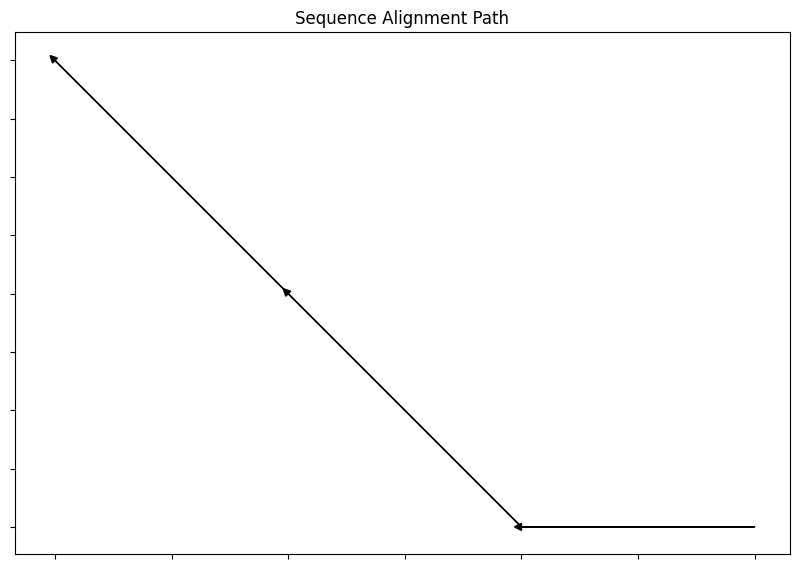

Params:
 Gap Penalty: -2
 Match: 2
 Mismatch: -1
Score Matrix:
[[ 0 -2 -4 -6 -8]
 [-2 -1 -3 -5 -7]
 [-4 -3  1 -1 -3]
 [-6 -5 -1  3  1]]
Path Matrix:
[['D' 'L' 'L' 'L']
 ['U' 'D' 'L' 'L']
 ['U' 'U' 'D' 'L']]
Result Strings:
 ABC-
 EBCH
Score:
 Alignment Length: 4
 Gap Percentage: 25.0
 Match Percentage: 50.0


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
class SequenceAlignmentNW:
    """
    Performs sequence alignment.
    Attributes:
        seq1 (str): The first sequence to align.
        seq2 (str): The second sequence to align.
        gap (int): Penalty score for introducing a gap.
        match (int): Score for a match between characters.
        mismatch (int): Penalty score for a mismatch between characters.
        matrix (numpy.ndarray): Score matrix.
        path_matrix (numpy.ndarray): The matrix representing the alignment path.
        filepath (str): Path to save alignment results.
    Methods:
        initialize_matrix: Initializes the score matrix and the alignment path matrix.
        fill_matrix: Fills the borders of the score matrix with gap penalties.
        fill_matrix_body: Fills the inner part of the score matrix using match and mismatch scores.
        fill_path_matrix: Fills the alignment path matrix based on the score matrix.
        align_sequences: Aligns the sequences.
        save_to_file: Saves alignment results to a text file.
    """

    def __init__(self, seq1, seq2, gap, match, mismatch, filepath):

        self.seq1 = seq1
        self.seq2 = seq2
        self.gap = gap
        self.match = match
        self.mismatch = mismatch
        self.matrix = None
        self.path_matrix = None
        self.seq1_result = None
        self.seq2_result = None
        self.counter = 0
        self.gap_counter = 0
        self.match_counter = 0
        self.filepath = filepath

    def initialize_matrix(self):

        self.path_matrix = np.zeros((len(self.seq1), len(self.seq2)), dtype=str)
        self.matrix = np.zeros((len(self.seq1)+1, len(self.seq2)+1), dtype=int)

    def fill_matrix(self):

        for i in range(len(self.seq1)+1):

            for j in range(len(self.seq2)+1):

                if i == 0 and j == 0:
                    self.matrix[i][j] = 0

                else:
                    if i == 0 or j == 0:
                        self.matrix[i][j] = max(i, j) * self.gap

    def fill_matrix_body(self):

        for i in range(1, len(self.seq1)+1):

            for j in range(1, len(self.seq2)+1):

                if self.seq1[i-1] == self.seq2[j-1]:
                    self.matrix[i][j] = max(
                        self.matrix[i][j-1] + self.gap,
                        self.matrix[i-1][j] + self.gap,
                        self.matrix[i-1][j-1] + self.match
                    )

                else:
                    self.matrix[i][j] = max(
                        self.matrix[i][j-1] + self.gap,
                        self.matrix[i-1][j] + self.gap,
                        self.matrix[i-1][j-1] + self.mismatch
                    )

    def fill_path_matrix(self):

        for i in range(1, len(self.seq1)+1):

            for j in range(1, len(self.seq2)+1):

                if self.seq1[i-1] == self.seq2[j-1]:

                    if self.matrix[i][j] == self.matrix[i][j-1] + self.gap:
                        self.path_matrix[i-1][j-1] = 'L'

                    elif self.matrix[i][j] == self.matrix[i-1][j] + self.gap:
                        self.path_matrix[i-1][j-1] = 'U'

                    else:
                        self.path_matrix[i-1][j-1] = 'D'

                else:
                    if self.matrix[i][j] == self.matrix[i][j-1] + self.gap:
                        self.path_matrix[i-1][j-1] = 'L'

                    elif self.matrix[i][j] == self.matrix[i-1][j] + self.gap:
                        self.path_matrix[i-1][j-1] = 'U'

                    else:
                        self.path_matrix[i-1][j-1] = 'D'

    def create_strings(self):

        self.seq1_result = ""
        self.seq2_result = ""
        rows, columns = self.path_matrix.shape
        rows -= 1
        columns -= 1

        while rows >= 0 and columns >= 0:

                if self.path_matrix[rows][columns] == 'D':
                    self.seq2_result = self.seq2[columns] + self.seq2_result
                    self.seq1_result = self.seq1[rows] + self.seq1_result
                    rows -= 1
                    columns -= 1
                    self.counter += 1
                    if self.seq1_result[0] == self.seq2_result[0]:
                        self.match_counter += 1

                elif self.path_matrix[rows][columns] == 'U':
                    self.seq2_result = "-" + self.seq2_result
                    self.seq1_result = self.seq1[rows] + self.seq1_result
                    rows -= 1
                    self.counter += 1
                    self.gap_counter += 1

                else:
                    self.seq2_result = self.seq2[columns] + self.seq2_result
                    self.seq1_result = "-" + self.seq1_result
                    columns -= 1
                    self.counter += 1
                    self.gap_counter += 1


    def plot_alignment_path(self):

        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_title("Sequence Alignment Path")

        ax.set_aspect('equal')

        ax.set_title("Sequence Alignment Path")

        seq1_reversed = self.seq1[::-1]
        seq2_reversed = self.seq2[::-1]

        i = len(seq1_reversed) - 2
        j = len(seq2_reversed) - 2

        while i >= 0 and j >= 0:

                if self.path_matrix[i, j] == 'D':
                    ax.arrow(j, -i, -1, 1, head_width=0.01*min(len(seq1_reversed),\
                      len(seq2_reversed)), head_length=0.01*min(len(seq1_reversed),\
                        len(seq2_reversed)), fc='k', ec='k') # arrow size is scaled depend on sequence length
                    i -= 1
                    j -= 1

                elif self.path_matrix[i, j] == 'U':
                    ax.arrow(j, -i, 0, 1, head_width=0.01*min(len(seq1_reversed),\
                      len(seq2_reversed)), head_length=0.01*min(len(seq1_reversed),\
                        len(seq2_reversed)), fc='k', ec='k')
                    i -= 1

                elif self.path_matrix[i, j] == 'L':
                    ax.arrow(j, -i, -1, 0, head_width=0.01*min(len(seq1_reversed),\
                      len(seq2_reversed)), head_length=0.01*min(len(seq1_reversed),\
                        len(seq2_reversed)), fc='k', ec='k')
                    j -= 1

        ax.set_xticklabels(" ")
        ax.set_yticklabels(" ")
        plt.savefig(self.filepath)
        plt.show()


    def align_sequences(self):

        self.initialize_matrix()
        self.fill_matrix()
        self.fill_matrix_body()
        self.fill_path_matrix()
        self.create_strings()
        self.plot_alignment_path()

    def save_to_file(self, file_path):

        with open(file_path, 'w') as file:

            file.write("Sequence 1: " + self.seq1 + "\n")
            file.write("Sequence 2: " + self.seq2 + "\n\n")
            file.write("Aligned Sequence 1: " + self.seq1_result + "\n")
            file.write("Aligned Sequence 2: " + self.seq2_result + "\n\n")
            file.write("Alignment Length: " + str(self.counter) + "\n")
            file.write("Gap Percentage: " + str(self.gap_counter / self.counter * 100))
            file.write("Match Percentage: " + str(self.match_counter / self.counter * 100))


    def __str__(self):

        return "Params:\n Gap Penalty: " + str(self.gap) + "\n Match: " \
             + str(self.match) + "\n Mismatch: " + str(self.mismatch) \
             + "\nScore Matrix:\n" + str(self.matrix) + "\nPath Matrix:\n" \
             + str(self.path_matrix) + "\nResult Strings:\n " \
             + str(self.seq1_result) + "\n " + str(self.seq2_result) \
             + "\nScore:\n Alignment Length: " + str(self.counter) \
             + "\n Gap Percentage: " + str(self.gap_counter / self.counter * 100) \
             + "\n Match Percentage: " + str(self.match_counter / self.counter * 100)

# Example usage:
seq1 = "ABC"
seq2 = "EBCH"
gap_penalty = -2
match_score = 2
mismatch_score = -1
filepath = "arrowsNW.png"

aligner = SequenceAlignmentNW(seq1, seq2, gap_penalty, match_score, mismatch_score, filepath)
aligner.align_sequences()
print(aligner)

# Save alignment results to a file
aligner.save_to_file("alignment_resultsNW.txt")



#Smith-Waterman
##Usage Instructions:
1. Defining Sequences and Parameters:

  Define the sequences for which you want to conduct the analysis and specify the analysis parameters, such as the gap penalty, match score, mismatch penalty, and provide the path to the file where the graphical representation of the alignment path should be saved. Example:

  seq1 = "ARRGGHPOBCD"

  seq2 = "ABCRRGQWEW"

  gap_penalty = -2

  match_score = 2

  mismatch_score = -1

  filepath = "arrowsSW.png"

2. Creating an Instance of the SequenceAlignment Class:

  Create an instance of the SequenceAlignment class, providing sequences and analysis parameters as constructor arguments:

  aligner = SequenceAlignmentSW(seq1, seq2, gap_penalty, match_score, mismatch_score)

3. Executing Sequence Analysis:

  Initiate the sequence alignment process by calling the align_sequences() method on the aligner object:

  aligner.align_sequences()

4. Saving Results to a File:

  To save the analysis results to a text file, invoke the save_to_file() method on the aligner object, specifying the file path as an argument:

  aligner.save_to_file("alignment_resultsSW.txt")

##Class describing local sequence alignment:

generates weight matrices and transition paths, based on protein sequences

<ipython-input-4-2d708d738761>:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(" ")
<ipython-input-4-2d708d738761>:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(" ")


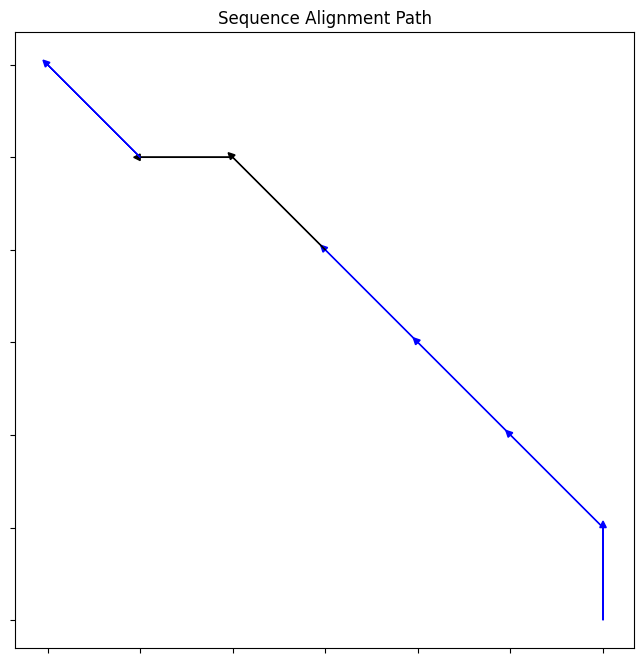

Params:
 Gap Penalty: -1
 Match: 1
 Mismatch: -0.5
Score Matrix:
[[0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.  1.  0. ]
 [0.  0.  0.  0.  0.  1.  3.  2. ]
 [0.  0.  1.  0.  0.  0.  2.  4. ]
 [0.  0.  0.  0.5 0.  0.  1.  3. ]]
Path Matrix:
[['D' 'D' 'D' 'D' 'D' 'D' 'D']
 ['D' 'L' 'D' 'D' 'D' 'D' 'D']
 ['D' 'D' 'D' 'D' 'D' 'D' 'D']
 ['U' 'D' 'D' 'D' 'L' 'D' 'D']
 ['D' 'D' 'D' 'U' 'D' 'L' 'D']
 ['D' 'D' 'D' 'D' 'U' 'D' 'D']
 ['D' 'D' 'D' 'D' 'D' 'U' 'D']]
Result Strings:
 ABCD
 ABCD
Score:
 Alignment Length: 4
 Gap Percentage: 0.0
 Match Percentage: 100.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time


class SequenceAlignmentSW:
    """
    Performs sequence alignment.
    Attributes:
        seq1 (str): The first sequence to align.
        seq2 (str): The second sequence to align.
        gap (int): Penalty score for introducing a gap.
        match (int): Score for a match between characters.
        mismatch (int): Penalty score for a mismatch between characters.
        matrix (numpy.ndarray): Score matrix.
        path_matrix (numpy.ndarray): The matrix representing the alignment path.
        filepath (str): Path to save alignment results.
    Methods:
        initialize_matrix: Initializes the score matrix and the alignment path matrix.
        fill_matrix: Fills the borders of the score matrix with gap penalties.
        fill_matrix_body: Fills the inner part of the score matrix using match and mismatch scores.
        fill_path_matrix: Fills the alignment path matrix based on the score matrix.
        align_sequences: Aligns the sequences.
        save_to_file: Saves alignment results to a text file.
    """

    def __init__(self, seq1, seq2, gap, match, mismatch, filepath):

        self.seq1 = seq1
        self.seq2 = seq2
        self.gap = gap
        self.match = match
        self.mismatch = mismatch
        self.matrix = None
        self.path_matrix = None
        self.seq1_result = None
        self.seq2_result = None
        self.counter = 0
        self.gap_counter = 0
        self.match_counter = 0
        self.filepath = filepath

    def initialize_matrix(self):
        self.matrix = np.zeros((len(self.seq1) + 1, len(self.seq2) + 1), dtype=float)

    def fill_matrix_body(self):

        for i in range(1, len(self.seq1) + 1):

            for j in range(1, len(self.seq2) + 1):

                if self.seq1[i - 1] == self.seq2[j - 1]:

                    if max( self.matrix[i][j - 1] + self.gap,
                            self.matrix[i - 1][j] + self.gap,
                            self.matrix[i - 1][j - 1] + self.match
                    ) > 0:
                        self.matrix[i][j] = max(
                            self.matrix[i][j - 1] + self.gap,
                            self.matrix[i - 1][j] + self.gap,
                            self.matrix[i - 1][j - 1] + self.match
                        )
                    else:
                        self.matrix[i][j] = 0

                else:

                    if max(
                            self.matrix[i][j - 1] + self.gap,
                            self.matrix[i - 1][j] + self.gap,
                            self.matrix[i - 1][j - 1] + self.mismatch
                    ) > 0:
                        self.matrix[i][j] = max(
                            self.matrix[i][j - 1] + self.gap,
                            self.matrix[i - 1][j] + self.gap,
                            self.matrix[i - 1][j - 1] + self.mismatch
                        )
                    else:
                        self.matrix[i][j] = 0

    def fill_path_matrix(self):

        max_index = np.argmax(self.matrix)
        max_rows, max_cols = self.matrix.shape
        max_row_index = max_index // max_cols
        max_col_index = max_index % max_cols
        self.path_matrix = np.zeros((max_row_index, max_col_index), dtype=str)

        for i in range(0, max_row_index):

            for j in range(0, max_col_index):

                if self.seq1[i-1] == self.seq2[j-1]:

                    if self.matrix[i][j] == self.matrix[i][j-1] + self.gap:
                        self.path_matrix[i-1][j-1] = 'L'

                    elif self.matrix[i][j] == self.matrix[i-1][j] + self.gap:
                        self.path_matrix[i-1][j-1] = 'U'

                    else:
                        self.path_matrix[i-1][j-1] = 'D'

                else:
                    if self.matrix[i][j] == self.matrix[i][j-1] + self.gap:
                        self.path_matrix[i-1][j-1] = 'L'

                    elif self.matrix[i][j] == self.matrix[i-1][j] + self.gap:
                        self.path_matrix[i-1][j-1] = 'U'

                    else:
                        self.path_matrix[i-1][j-1] = 'D'

    def create_strings(self):

        self.seq1_result = ""
        self.seq2_result = ""
        rows, columns = self.path_matrix.shape
        rows -= 1
        columns -= 1

        while rows >= 0 and columns >= 0:

            if self.matrix[rows + 1][columns + 1] == 0:
              break

            elif self.path_matrix[rows][columns] == 'D':
                self.seq2_result = self.seq2[columns] + self.seq2_result
                self.seq1_result = self.seq1[rows] + self.seq1_result
                rows -= 1
                columns -= 1
                self.counter += 1
                if self.seq1_result[0] == self.seq2_result[0]:
                    self.match_counter += 1

            elif self.path_matrix[rows][columns] == 'U':
                self.seq2_result = "-" + self.seq2_result
                self.seq1_result = self.seq1[rows] + self.seq1_result
                rows -= 1
                self.counter += 1
                self.gap_counter += 1

            else:
                self.seq2_result = self.seq2[columns] + self.seq2_result
                self.seq1_result = "-" + self.seq1_result
                columns -= 1
                self.counter += 1
                self.gap_counter += 1

    def plot_alignment_path(self):

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title("Sequence Alignment Path")

        ax.set_aspect('equal')

        ax.set_title("Sequence Alignment Path")

        seq1_reversed = self.seq1[::-1]
        seq2_reversed = self.seq2[::-1]

        i = len(seq1_reversed) - 2
        j = len(seq2_reversed) - 2

        while i >= 0 and j >= 0:

            if self.matrix[i+1, j+1] == 0:

              if self.path_matrix[i, j] == 'D':
                  ax.arrow(j, -i, -1, 1, head_width=0.01 * min(len(seq1_reversed), len(seq2_reversed)),
                          head_length=0.01 * min(len(seq1_reversed), len(seq2_reversed)), fc='k', ec='k')  # arrow size is scaled depend on sequence length
                  i -= 1
                  j -= 1

              elif self.path_matrix[i, j] == 'U':
                  ax.arrow(j, -i, 0, 1, head_width=0.01 * min(len(seq1_reversed), len(seq2_reversed)),
                          head_length=0.01 * min(len(seq1_reversed), len(seq2_reversed)), fc='k', ec='k')
                  i -= 1

              elif self.path_matrix[i, j] == 'L':
                  ax.arrow(j, -i, -1, 0, head_width=0.01 * min(len(seq1_reversed), len(seq2_reversed)),
                          head_length=0.01 * min(len(seq1_reversed), len(seq2_reversed)), fc='k', ec='k')
                  j -= 1

            else:
              if self.path_matrix[i, j] == 'D':
                  ax.arrow(j, -i, -1, 1, head_width=0.01 * min(len(seq1_reversed), len(seq2_reversed)),
                          head_length=0.01 * min(len(seq1_reversed), len(seq2_reversed)), fc='b', ec='b')  # arrow size is scaled depend on sequence length
                  i -= 1
                  j -= 1

              elif self.path_matrix[i, j] == 'U':
                  ax.arrow(j, -i, 0, 1, head_width=0.01 * min(len(seq1_reversed), len(seq2_reversed)),
                          head_length=0.01 * min(len(seq1_reversed), len(seq2_reversed)), fc='b', ec='b')
                  i -= 1

              elif self.path_matrix[i, j] == 'L':
                  ax.arrow(j, -i, -1, 0, head_width=0.01 * min(len(seq1_reversed), len(seq2_reversed)),
                          head_length=0.01 * min(len(seq1_reversed), len(seq2_reversed)), fc='b', ec='b')
                  j -= 1

        ax.set_xticklabels(" ")
        ax.set_yticklabels(" ")
        plt.savefig(self.filepath)
        plt.show()

    def align_sequences(self):

        self.initialize_matrix()
        self.fill_matrix_body()
        self.fill_path_matrix()
        self.create_strings()
        self.plot_alignment_path()

    def save_to_file(self, file_path):

        with open(file_path, 'w') as file:
            file.write("Sequence 1: " + self.seq1 + "\n")
            file.write("Sequence 2: " + self.seq2 + "\n\n")
            file.write("Aligned Sequence 1: " + self.seq1_result + "\n")
            file.write("Aligned Sequence 2: " + self.seq2_result + "\n\n")
            file.write("Alignment Length: " + str(self.counter) + "\n")
            file.write("Gap Percentage: " + str(self.gap_counter / self.counter * 100))
            file.write("Match Percentage: " + str(self.match_counter / self.counter * 100))

    def __str__(self):

        return "Params:\n Gap Penalty: " + str(self.gap) + "\n Match: " \
            + str(self.match) + "\n Mismatch: " + str(self.mismatch) \
            + "\nScore Matrix:\n" + str(self.matrix) + "\nPath Matrix:\n" \
            + str(self.path_matrix) + "\nResult Strings:\n " \
            + str(self.seq1_result) + "\n " + str(self.seq2_result) \
            + "\nScore:\n Alignment Length: " + str(self.counter) \
            + "\n Gap Percentage: " + str(self.gap_counter / self.counter * 100) \
            + "\n Match Percentage: " + str(self.match_counter / self.counter * 100)


# Example usage:
seq1 = "EFFABCDE"
seq2 = "FDSABCD"
gap_penalty = -1
match_score = 1
mismatch_score = -0.5
filepath = "arrowsSW.png"

aligner = SequenceAlignmentSW(seq1, seq2, gap_penalty, match_score, mismatch_score, filepath)
aligner.align_sequences()
print(aligner)

# Save alignment results to a file
aligner.save_to_file("alignment_resultsSW.txt")
